<a href="https://colab.research.google.com/github/katusabevictoria/katusabevictoria/blob/main/Project_1_week_4___Victoria_Katusabe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sales_data ='/content/drive/MyDrive/Colab data uploads/sales_predictions_2023.csv'
df = pd.read_csv(sales_data)
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

 Address the missing values by using a placeholder value.**

In [5]:
# Replace null values with placeholders
placeholder = 'NA'  # Specify the placeholder you want to use
df_filled = df.fillna(placeholder)
df_filled

Item_Identifier Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15         9.3          Low Fat         0.016047   
1              DRC01        5.92          Regular         0.019278   
2              FDN15        17.5          Low Fat         0.016760   
3              FDX07        19.2          Regular         0.000000   
4              NCD19        8.93          Low Fat         0.000000   
...              ...         ...              ...              ...   
8518           FDF22       6.865          Low Fat         0.056783   
8519           FDS36        8.38          Regular         0.046982   
8520           NCJ29        10.6          Low Fat         0.035186   
8521           FDN46        7.21          Regular         0.145221   
8522           DRG01        14.8          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998          NA               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002          NA               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

**Remove the placeholders you added in week 2 and replace them with null values**

In [6]:
df_cleaned = df.replace(placeholder, pd.NA)
print(df_cleaned)
df.head()

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [8]:
# Convert DataFrame to Markdown with a header
markdown_header = '##sales prediction data\n\n'
markdown_table = df.to_markdown()
# Combine header and table
markdown_output = markdown_header + markdown_table
print(markdown_output)

##sales prediction data

|      | Item_Identifier   |   Item_Weight | Item_Fat_Content   |   Item_Visibility | Item_Type             |   Item_MRP | Outlet_Identifier   |   Outlet_Establishment_Year | Outlet_Size   | Outlet_Location_Type   | Outlet_Type       |   Item_Outlet_Sales |
|-----:|:------------------|--------------:|:-------------------|------------------:|:----------------------|-----------:|:--------------------|----------------------------:|:--------------|:-----------------------|:------------------|--------------------:|
|    0 | FDA15             |         9.3   | Low Fat            |        0.0160473  | Dairy                 |   249.809  | OUT049              |                        1999 | Medium        | Tier 1                 | Supermarket Type1 |           3735.14   |
|    1 | DRC01             |         5.92  | Regular            |        0.0192782  | Soft Drinks           |    48.2692 | OUT018              |                        2009 | Medium        | Tier 3    

In [9]:
#markdown_header = '##sales prediction data\n\n'#'## My DataFrame\n\n'
markdown_table = df.to_markdown()
# Combine header and table
markdown_output = markdown_table

print(markdown_output)

|      | Item_Identifier   |   Item_Weight | Item_Fat_Content   |   Item_Visibility | Item_Type             |   Item_MRP | Outlet_Identifier   |   Outlet_Establishment_Year | Outlet_Size   | Outlet_Location_Type   | Outlet_Type       |   Item_Outlet_Sales |
|-----:|:------------------|--------------:|:-------------------|------------------:|:----------------------|-----------:|:--------------------|----------------------------:|:--------------|:-----------------------|:------------------|--------------------:|
|    0 | FDA15             |         9.3   | Low Fat            |        0.0160473  | Dairy                 |   249.809  | OUT049              |                        1999 | Medium        | Tier 1                 | Supermarket Type1 |           3735.14   |
|    1 | DRC01             |         5.92  | Regular            |        0.0192782  | Soft Drinks           |    48.2692 | OUT018              |                        2009 | Medium        | Tier 3                 | Supermarke

In [10]:
# Assuming you have a data dictionary stored as a dictionary
data_dictionary = {
    'feature1': 'Definition of feature 1',
    'feature2': 'Definition of feature 2',
    # Add more feature definitions as needed
}

# Convert the data dictionary to a DataFrame
df_data_dict = pd.DataFrame(data_dictionary.items(), columns=['Feature', 'Definition'])

# Create a Markdown string
markdown_text = "### Data Dictionary\n\n" + df_data_dict.to_markdown(index=False)

print(markdown_text)

### Data Dictionary

| Feature   | Definition              |
|:----------|:------------------------|
| feature1  | Definition of feature 1 |
| feature2  | Definition of feature 2 |


In [11]:
#create a data dictionary
data_dictionary = {
    'Item_Identifier': 'Product ID',
    'Item_Weight': 'Weight of product',
    'Item_Fat_Content': 'Whether the product is low-fat or regular',
    'Item_Visibility': 'The percentage of total display area of all products in a store allocated to the particular product',
    'Item_Type': 'The category to which the product belongs',
    'Item_MRP': 'Maximum Retail Price (list price) of the product',
    'Outlet_Identifier': 'Store ID',
    'Outlet_Establishment_Year': 'Outlet_Establishment_Year',
    'Outlet_Size': 'The size of the store in terms of ground area covered',
    'Outlet_Location_Type': 'The type of area in which the store is located',
    'Outlet_Type': 'Product ID',
    'Item_Weight': 'Whether the outlet is a grocery store or some sort of supermarket',
    'Item_Outlet_Sales': 'Sales of the product in the particular store. This is the target variable to be predicted.'
}

# Convert the data dictionary to a DataFrame
df_data_dict = pd.DataFrame(data_dictionary.items(), columns=['Feature', 'Definition'])

# Create a Markdown string
markdown_text = "### Data Dictionary\n\n" + df_data_dict.to_markdown(index=False)

print(markdown_text)

### Data Dictionary

| Feature                   | Definition                                                                                          |
|:--------------------------|:----------------------------------------------------------------------------------------------------|
| Item_Identifier           | Product ID                                                                                          |
| Item_Weight               | Whether the outlet is a grocery store or some sort of supermarket                                   |
| Item_Fat_Content          | Whether the product is low-fat or regular                                                           |
| Item_Visibility           | The percentage of total display area of all products in a store allocated to the particular product |
| Item_Type                 | The category to which the product belongs                                                           |
| Item_MRP                  | Maximum Retail Price (lis

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
x=['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
     'Item_Type', 'Item_MRP', 'Outlet_Identifier',
      'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']

In [14]:
#x=df['Item_Weight']

In [15]:
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax



In [16]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


In [17]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales',
                           figsize=(6,4),
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

In [18]:
New_df = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']
df2 = df[New_df]
df2

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  
0     Supermarket Type1  
1     Supermarket Type2  
2     Supermarket Type1  
3         Grocery Store  
4     Supermarket Type1  
...                 ...  
8518  Supermarket Type1  
8519  Supermarket Type1  
8520  Supermarket Type1  
8521  Supermarket Type2  
8522  Supermarket Type1  

[8523 rows x 11 columns]

In [ ]:
df2.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [19]:
feature = "Item_Fat_Content"
df[feature].dtype

dtype('O')

<ipython-input-16-bb05217bb22a>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


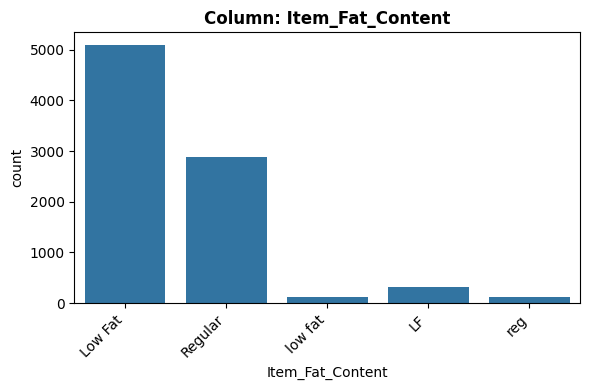

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: 'Low Fat' occurs 5089 times (59.71%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_Fat_Content'}, xlabel='Item_Fat_Content', ylabel='count'>)

In [20]:
explore_categorical(df,'Item_Fat_Content')

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal Features

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 - There is nothing to impute.

3. Is the feature constant or quasi-constant?
  - No, its not.

4. What is the cardinality? Is it high (>10)?
  - It is low (5 unique values).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



In [ ]:
feature = "Item_Visibility"
df[feature].dtype

dtype('float64')

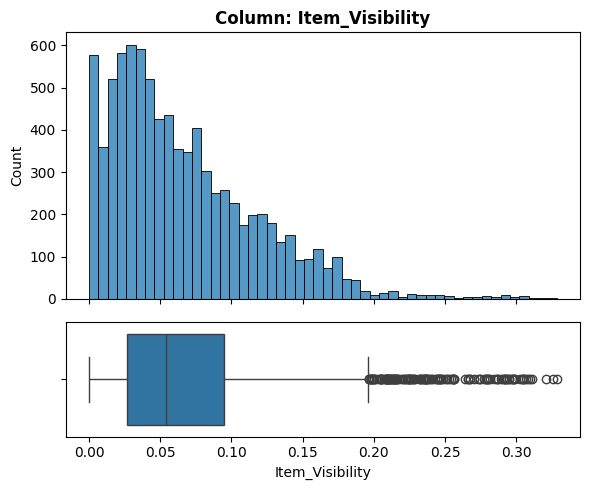

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_Visibility'}, xlabel='Item_Visibility', ylabel='Count'>,
        <Axes: xlabel='Item_Visibility'>], dtype=object))

In [ ]:
explore_numeric(df,'Item_Visibility')

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0. Nothing to impute.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high (>10)?
  - 5 unique values (Very High).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


In [ ]:
feature = "Item_Weight"
df[feature].dtype

dtype('float64')

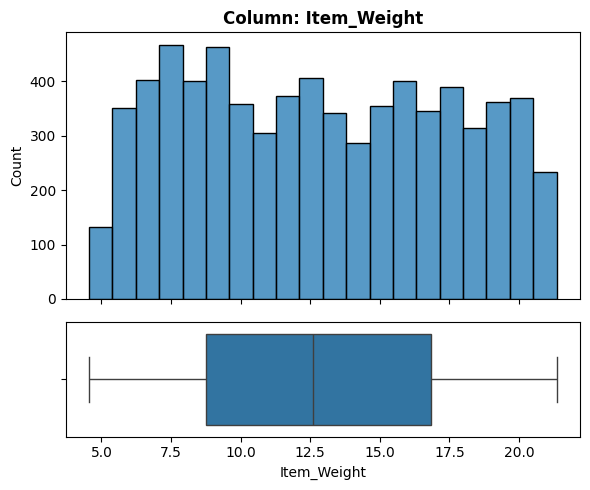

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_Weight'}, xlabel='Item_Weight', ylabel='Count'>,
        <Axes: xlabel='Item_Weight'>], dtype=object))

In [ ]:
explore_numeric(df,'Item_Weight')

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1463 (17.17%) . we can impute the null values with mean values

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high (>10)?
  - 5 unique values (Very High).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - yes.

In [ ]:
feature = "Item_MRP"
df[feature].dtype

dtype('float64')

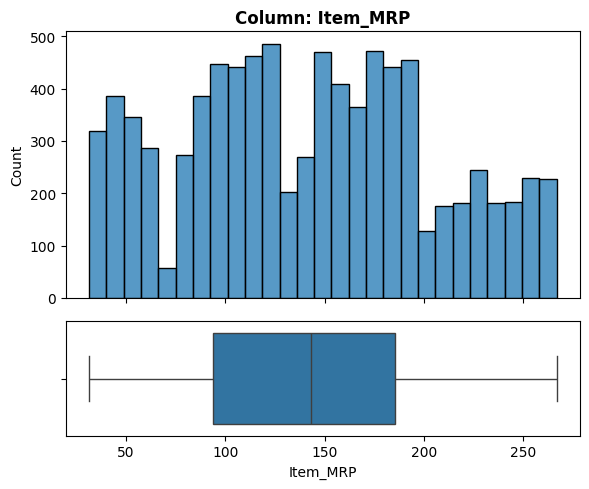

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_MRP'}, xlabel='Item_MRP', ylabel='Count'>,
        <Axes: xlabel='Item_MRP'>], dtype=object))

In [ ]:
explore_numeric(df,'Item_MRP')

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - No - nothing to impute

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high (>10)?
  - 5938 unique values (Very High).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - Yes.

In [ ]:
feature = "Outlet_Size"
df[feature].dtype

dtype('O')

<ipython-input-28-d4c1ca917ec5>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


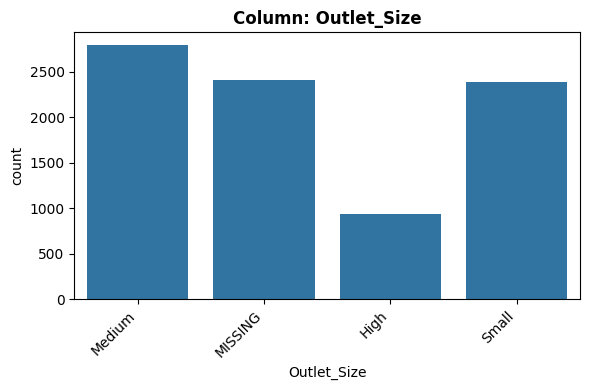

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Size'}, xlabel='Outlet_Size', ylabel='count'>)

In [ ]:
explore_categorical(df,'Outlet_Size')



Feature Observations

    What type of feature is it? (Categorical (nominal), ordinal, numeric)
        nominal

    How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
        2410 (28.28%) - nothing to impute

    Is the feature constant or quasi-constant?
        No.

    What is the cardinality? Is it high (>10)?
        4 unique values (Very low).

    Would we know this BEFORE the target is determined?
        Yes.

    Is there a business case/understanding reason to exclude based on our business case?
        Yes.



In [ ]:
df.columns
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

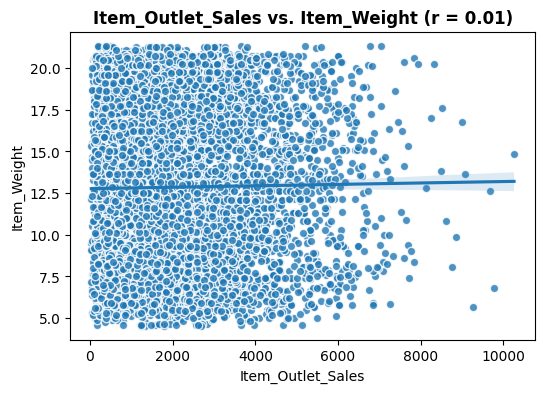

In [ ]:
feature = 'Item_Outlet_Sales'
plot_numeric_vs_target(df,feature,'Item_Weight');


Answer the following questions from the Feature Inspection lesson in a Markdown cell:

    Based on your business understanding, would you expect this feature to be a predictor of the target?
     NO
    Does this feature appear to be a predictor of the target?
    NO

<ipython-input-59-6ae2fff6fcf6>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


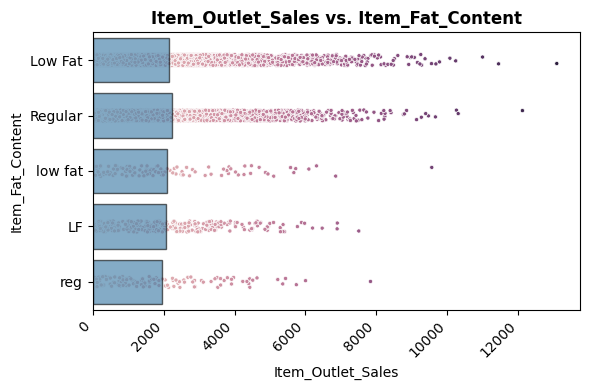

In [ ]:
feature = 'Item_Outlet_Sales'
plot_categorical_vs_target(df,feature,'Item_Fat_Content');

Answer the following questions from the Feature Inspection lesson in a Markdown cell:

    Based on your business understanding, would you expect this feature to be a predictor of the target?
    No
    Does this feature appear to be a predictor of the target?
    No

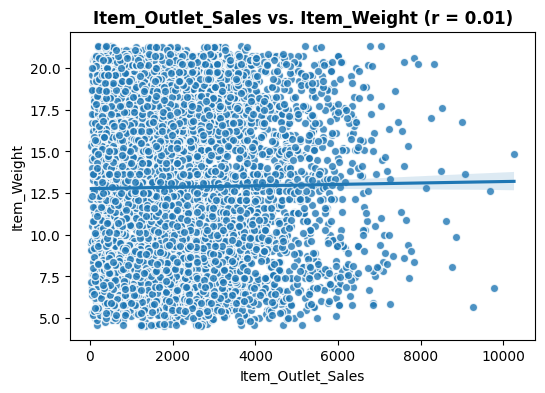

In [ ]:
feature = 'Item_Outlet_Sales'
plot_numeric_vs_target(df,feature,'Item_Weight');

Answer the following questions from the Feature Inspection lesson in a Markdown cell:

    Based on your business understanding, would you expect this feature to be a predictor of the target?
    No
    Does this feature appear to be a predictor of the target?
    No

In [ ]:
feature = 'Item_Outlet_Sales'
plot_numeric_vs_target(df,feature,'Item_Visibility');

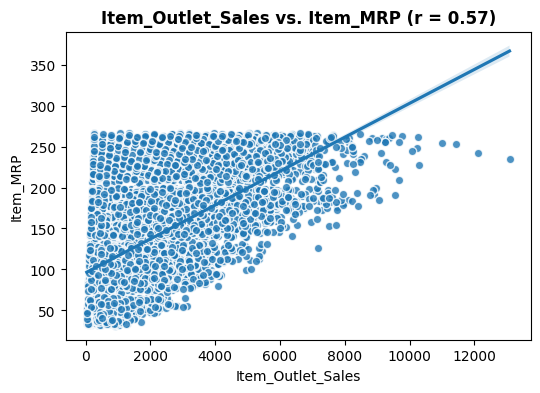

In [ ]:
feature = 'Item_Outlet_Sales'
plot_numeric_vs_target(df,feature,'Item_MRP');

cell:

    Based on your business understanding, would you expect this feature to be a predictor of the target?
    Yes
    Does this feature appear to be a predictor of the target?
    Yes

<ipython-input-59-6ae2fff6fcf6>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


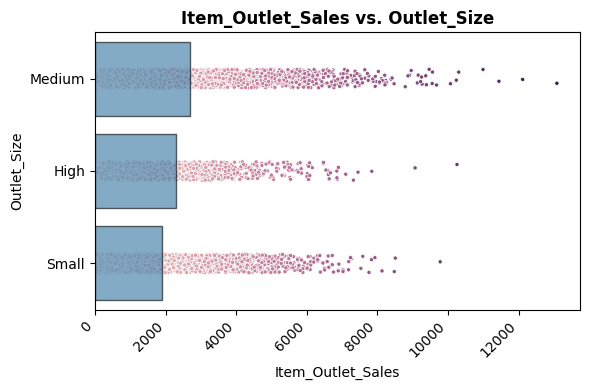

In [ ]:
feature = 'Item_Outlet_Sales'
plot_categorical_vs_target(df,feature,'Outlet_Size');

Answer the following questions from the Feature Inspection lesson in a Markdown cell:

    Based on your business understanding, would you expect this feature to be a predictor of the target?
    No
    Does this feature appear to be a predictor of the target?
    No

<ipython-input-59-6ae2fff6fcf6>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


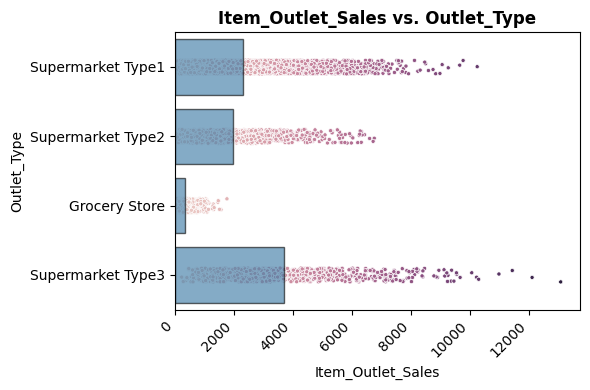

In [ ]:
feature = 'Item_Outlet_Sales'
plot_categorical_vs_target(df,feature,'Outlet_Type');

Answer the following questions from the Feature Inspection lesson in a Markdown cell:

    Based on your business understanding, would you expect this feature to be a predictor of the target?
    No
    Does this feature appear to be a predictor of the target?
    No